In [1]:
import numpy as np
import matplotlib.pyplot as plt

#from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization, Dropout
import cv2
import matplotlib.pyplot as plt

import os
import sys

Using TensorFlow backend.


In [127]:
# 데이터셋 호출(train)
train_x = np.zeros((15*3,24,24)) 
train_y = np.zeros(15*3)
#print(train_x)
#print(train_y)

for i in range (15):
    img = cv2.imread('./data/train/triangle/triangle{0:03d}.png'.format(i+1) ,  cv2.IMREAD_GRAYSCALE)
    train_x[i,:,:] = img
    train_y[i] = 0
    
    img2 = cv2.imread('./data/train/rectangle/rectangle{0:03d}.png'.format(i+1) ,  cv2.IMREAD_GRAYSCALE)
    train_x[i+15,:,:] = img2
    train_y[i+15] = 1
    
    img2 = cv2.imread('./data/train/circle/circle{0:03d}.png'.format(i+1) ,  cv2.IMREAD_GRAYSCALE)
    train_x[i+30,:,:] = img2
    train_y[i+30] = 2

In [128]:
# plt.imshow(train_x[14,:,:])

In [130]:
#데이터셋 호출(test)
test_x = np.zeros((15,24,24)) 
test_y = np.zeros(15)
for i in range (5):
    img2 = cv2.imread('./data/test/triangle/triangle{0:03d}.png'.format(i+21) ,  cv2.IMREAD_GRAYSCALE)
    test_x[i,:,:] = img2
    test_y[i] = 0
    
    img2 = cv2.imread('./data/test/rectangle/rectangle{0:03d}.png'.format(i+21) ,  cv2.IMREAD_GRAYSCALE)
    test_x[i+5,:,:] = img2
    test_y[i+5] = 1
    
    img2 = cv2.imread('./data/test/circle/circle{0:03d}.png'.format(i+21) ,  cv2.IMREAD_GRAYSCALE)
    test_x[i+10,:,:] = img2
    test_y[i+10] = 2

print(test_x.shape)

(15, 24, 24)


In [131]:
#데이터셋 호출(test_easy)
test_easy_x = np.zeros((15,24,24))  
test_easy_y = np.zeros(15)
for i in range (5):
    img3 = cv2.imread('./data/test_easy/triangle/triangle{0:03d}.png'.format(i+16) ,  cv2.IMREAD_GRAYSCALE)
    test_easy_x[i,:,:] = img3
    test_easy_y[i] = 0
    
    img3 = cv2.imread('./data/test_easy/rectangle/rectangle{0:03d}.png'.format(i+16) ,  cv2.IMREAD_GRAYSCALE)
    test_easy_x[i+5,:,:] = img3
    test_easy_y[i+5] = 1
    
    img3 = cv2.imread('./data/test_easy/circle/circle{0:03d}.png'.format(i+16) ,  cv2.IMREAD_GRAYSCALE)
    test_easy_x[i+10,:,:] = img3
    test_easy_y[i+10] = 2

print(test_easy_x.shape)

(15, 24, 24)


In [134]:
#3차원에서 4차원으로 변경
# 3차원 ->4차원 왜 바꿈? , 칼라영상의 계산의 효율성을 위해
train_x = train_x.reshape((train_x.shape[0], train_x.shape[1], train_x.shape[2], 1)) # 갯수 , 사이즈(24,24)  갯수 모르면 -1 써도됨
test_x = test_x.reshape((test_x.shape[0], test_x.shape[1], test_x.shape[2], 1))
test_easy_x = test_easy_x.reshape((test_easy_x.shape[0], test_easy_x.shape[1], test_easy_x.shape[2], 1))

#원핫인코딩
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)
test_easy_y = to_categorical(test_easy_y)

In [17]:
# print(train_y[2])
# plt.imshow(train_x[2,:,:,0], cmap='gray')
# plt.show()

In [125]:
model = Sequential()

model.add(Conv2D(input_shape = (train_x.shape[1], train_x.shape[2], train_x.shape[3]), 
                 filters = 64, kernel_size = (3,3), strides = (1,1), padding = 'valid')) 
# 커널사이즈(3x3)x필터수(32) + 필터수(32, 바이어스) = 320
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2))) # 영상 중 가장 큰값 , 커널사이즈가 반으로 줄어든다

model.add(Flatten()) #1차원으로 변환

model.add(Dense(128, activation = 'relu'))

model.add(Dense(3, activation = 'softmax')) # 파라미터, (input*노드수) + 바이어스(노드수)

adam = optimizers.Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 22, 22, 64)        640       
_________________________________________________________________
activation_86 (Activation)   (None, 22, 22, 64)        0         
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
flatten_23 (Flatten)         (None, 7744)              0         
_________________________________________________________________
dense_66 (Dense)             (None, 128)               991360    
_________________________________________________________________
dense_67 (Dense)             (None, 3)                 387       
Total params: 992,387
Trainable params: 992,387
Non-trainable params: 0
_______________________________________________

In [166]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), input_shape = (24,24,1) )) 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten()) #1차원으로 변환

model.add(Dense(128))
model.add(BatchNormalization()) # 스케일 후 복원하기 위해 파라미터를 가지고 있는다
model.add(Activation('relu'))

model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(Dense(3, activation = 'softmax')) # 파라미터, (input*노드수) + 바이어스(노드수)

adam = optimizers.Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 22, 22, 32)        320       
_________________________________________________________________
batch_normalization_97 (Batc (None, 22, 22, 32)        128       
_________________________________________________________________
activation_99 (Activation)   (None, 22, 22, 32)        0         
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 9, 9, 64)          18496     
_________________________________________________________________
batch_normalization_98 (Batc (None, 9, 9, 64)          256       
_________________________________________________________________
activation_100 (Activation)  (None, 9, 9, 64)        

In [146]:
# for l in model.layers:
#     print(l.name, end=' ')
#     print(l.trainable)
    
    
# w = model.layers[0].get_weights()
# print(w[0].shape)
# print(w[1].shape)

#print(w[0][:,:,0,0]) # 첫번째 레이어의 첫번째 필터
#print(w[0][0])
#print(w[1][0]) #w[0](첫번째 레이어)의 아웃풋 결과
#print(model.layers[0].output)


# print(w[0][:,:,0,1]) # 첫번째 레이어의 두번째 필터

#model.layers[3].output

#필터를 그래프로 표시
#plt.imshow(w[0][:,:,0,0], cmap="gray")

(45, 22, 22, 32)


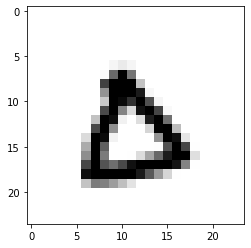

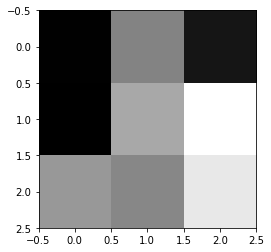

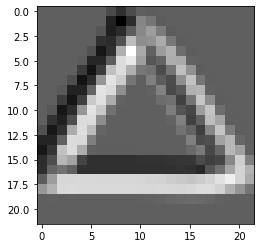

In [226]:
from keras.models import Model

my_layer_model = Model(inputs=model.input,  # input은 그릇(24,24,1, 
                       outputs=model.layers[0].output)
output = my_layer_model.predict(train_x)


print(output.shape) #(45, 22, 22, 32)

ifilter = 5
iimg = 1

#1번째 이미지(원본)
plt.imshow(test_x[iimg,:,:,0], cmap="gray") # 마지막 0은 그레이색이기 때문에 0으로 적음
plt.show()

#5번째 필터
w = model.layers[0].get_weights()
#filtets, bias = model.layers[0].get_weights()
w = w[0]
f = w[:,:,0,ifilter]
plt.imshow(f, cmap="gray")
plt.show()

#출력 = 0번째 이미지*(0번째필터 +b)
plt.imshow(output[iimg,:,:,ifilter], cmap="gray") # 0번째 테스트 이미지에 5번째 필터를 적용한 결과값 
plt.show()

In [224]:
w[0].shape

(3, 1, 32)

In [121]:
#flatten 의 출력값 찾기
my_layer_model = Model(inputs=model.input,  # input은 그릇(24,24,1, 
                       outputs=model.get_layer('flatten_22').output)
output = my_layer_model.predict(test_x) #(15, 1024) 1024개의 데이터가 나옴. 이걸로 학습을 진행함
print(output.shape) #(15, 1024)

(15, 1024)


In [228]:
#끝 dense의 출력값 찾기
my_layer_model = Model(inputs=model.input,  # input은 그릇(24,24,1, 
                       outputs=model.get_layer('dense_79').output)
output = my_layer_model.predict(test_x) #(15, 1024) 1024개의 데이터가 나옴. 이걸로 학습을 진행함
print(output.shape) #(15, 3) #15개 샘플(테스트 셋)에 대해  맨 마지막  출력인 output 값을 보겠다(3은 각각의 출력물).
#print(output) 
"""
(15, 1024)
(15, 3)
[[7.75544180e-08 9.99999881e-01 8.67174378e-27] # 1번째 출력은 3번째값이 젤 높으므로 3번째
 [4.09071860e-10 1.00000000e+00 7.94883572e-36]
 [2.32840033e-13 1.00000000e+00 6.01303942e-37]
 [4.80035912e-16 1.00000000e+00 4.24682454e-36]
 [1.57335527e-12 1.00000000e+00 2.59579688e-34]
 [1.08055075e-11 1.00000000e+00 1.80140438e-36]
 [5.98991817e-14 1.00000000e+00 1.14172364e-35]
 [7.85966778e-12 1.00000000e+00 3.98081786e-33]
 [5.39832393e-15 1.00000000e+00 0.00000000e+00]
 [2.51099785e-09 1.00000000e+00 1.71708240e-30]
 [6.87468962e-12 1.00000000e+00 0.00000000e+00]
 [8.78271175e-18 1.00000000e+00 0.00000000e+00]
 [2.60985816e-10 1.00000000e+00 2.58666338e-34]
 [3.89798115e-05 9.99961019e-01 1.12293080e-32]
 [2.09638418e-10 1.00000000e+00 5.03676909e-36]]

argmax 사용해서 각각에 대해 높은 값을 출력
"""

p = np.argmax(output,axis=1)
t = np.argmax(test_y, axis=1)
print(p)
print(t)
print( (p==t)*1)
print( sum(p==t)*1)
print( sum(p==t)*1 / len(p))

(15, 3)
[0 0 0 0 0 2 0 0 0 0 0 2 0 0 0]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]
[1 1 1 1 1 0 0 0 0 0 0 1 0 0 0]
6
0.4


In [ ]:
for i in range(32):
    

## 모델 성능 그래프

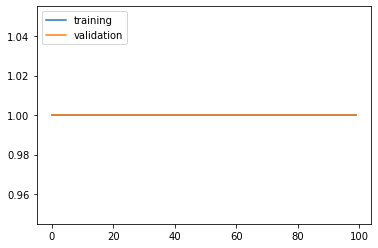

15/15 [==============================] - 0s 504us/step
Test_easy accuracy:  1.0
15/15 [==============================] - 0s 200us/step
Test accuracy:  0.3333333432674408


In [230]:
history = model.fit(train_x, train_y, batch_size = 20, validation_split = 0.2, epochs = 100, verbose = 0)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

#y_test_easy = model.predict(test_easy_x)

results = model.evaluate(test_easy_x, test_easy_y)
print('Test_easy accuracy: ', results[1])

results = model.evaluate(test_x, test_y)
print('Test accuracy: ', results[1])